# 1.2. Elements of Linear Algebra
_________________________________
### Key Concepts:
* Orthogonality
* Gram-Schmidt Process
* Eigenvalues and Eigenvectors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import Image

#### Helper Functions

In [2]:
def generate_random_matrix(size: int = 3):
    """
    Generates Random Square Matrix of given Size with Integers (0-99)
    """
    return np.random.randint(0, 100, [size, size])

### Global Variables

In [3]:
matrix_size = 3

# Generate a random 3x3 Matrix A
A = generate_random_matrix(matrix_size)
print("Random 3x3 Matrix A:\n", A)

# Generate another random matrix B
B = generate_random_matrix(matrix_size)
print("Random 3x3 Matrix B:\n", B)

Random 3x3 Matrix A:
 [[28  5 57]
 [ 5 60 26]
 [21 24 11]]
Random 3x3 Matrix B:
 [[54 28 76]
 [ 3 74 90]
 [23 22  7]]


## Projection

${\displaystyle \operatorname {proj} _{\mathbf {u} }(\mathbf {v} )={\frac {\langle \mathbf {u} ,\mathbf {v} \rangle }{\langle \mathbf {u} ,\mathbf {u} \rangle }}{\mathbf {u} }}$


In [4]:
def project(u, v):
    """
    Project vector u onto v
    :param u: Vector u
    :param v: Vector v
    :return:
    """
    return np.multiply((np.dot(u, v) / np.dot(u, u)), u)

In [5]:
# Project the first col of A onto first col of B
proj_A_B = project(A[:, 0], B[:, 0])
print("A1 Projected onto B1")
print(proj_A_B)

A1 Projected onto B1
[45.024  8.04  33.768]


## Gram-Schmidt Process


In [6]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/c14bc18275503c8b2593498757740976cf0e078a", height=175)

In [7]:
def gram_schmidt(u, v, k):
    """
    Gram-Schmidt Process for step k
    :param u: First set of vectors
    :param v: Second set of vectors
    :param k: Step
    :return e: Orthonormal vector
    """
    # Index starts at 0 (not 1) in python
    k = k-1

    # Get v_k
    v_k = v[:, k]

    # Calculate projection matrices
    proj_sum = np.zeros(v_k.shape)

    # Iterate from first to second-to-last element
    for j in range(0, k):

        # Project u_j onto v_k
        proj_sum += project(u[:, j], v_k)

    # Calculate the new vector
    u_k = (v_k - proj_sum)

    # Normalize
    e_k = (u_k / np.linalg.norm(u_k))

    return e_k

In [8]:
def gram_schmidt_matrix(A):
    """
    Find the Gram-Schmidt of a Matrix
    """

    # Set A to float type
    A = A.astype('float64')

    # Copy A. First column remains the same
    U = np.copy(A.astype('float64'))

    # Copy A. First column is the same but normalized
    E = np.zeros(A.shape)
    E[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])

    # Iterate through each column
    for k in range(1, U.shape[1]):

        u_k = A[:, k]

        # Iterate through each column to the left of k
        for j in range(k):
            u_k -= project(U[:, j], A[:, k])

        # Update U
        U[:, k] = u_k

        # Update E
        E[:, k] = U[:, k] / np.linalg.norm(U[:, k])

    return E

In [9]:
# Calculate the Gram-Schmidt of A
gs_A = gram_schmidt_matrix(A)

print("Gram-Schmidt Matrix of A:")
print(gs_A)

Gram-Schmidt Matrix of A:
[[ 0.79195959 -0.27337593  0.54595385]
 [ 0.14142136  0.95198     0.2715402 ]
 [ 0.5939697   0.13783934 -0.79259089]]


## Eigenvalues and Eigenvectors

${\displaystyle A\mathbf {x} =\lambda \mathbf {x}}$

$A$ is a **Square Matrix**,
$\lambda$ is an **Eigenvalue**,
$x$ is the corresponding **non-zero Eigenvector**.

#### Power Method
Iterative method to find the largest Eigenvalue and the corresponding Eigenvector

In [10]:
def power_method(A, n=100):
    """
    Find the largest Eigenvalue and the corresponding Eigenvector
    :param A: Matrix A
    :param n: Number of Iterations
    :return: (Eigenvalue, Eigenvector)
    """

    # Generate a random starting eigenvector
    e_vec = np.random.rand(A.shape[1])

    # Initialize eigenvalue to 0
    e_val = 0

    for _ in range(n):
        e_vec_n = np.dot(A, e_vec)

        # Calculate the Eigenvalue
        e_val = np.linalg.norm(e_vec_n)

        # Normalize and update Eigenvector
        e_vec = e_vec_n / e_val

    return e_val, e_vec

In [11]:
l_eval_a, l_evec_a = power_method(A)

print("Largest Eigenvalue: ", l_eval_a)
print("Largest Eigenvector: ", l_evec_a)

Largest Eigenvalue:  78.98582855738749
Largest Eigenvector:  [0.54468539 0.72371977 0.42373048]


#### Verify

In [12]:
# Compute Ax and λx
ax_a = np.dot(A, l_evec_a)
lx_a = np.dot(l_eval_a, l_evec_a)

# Compare Ax and λx
ax_is_lx = np.allclose(ax_a, lx_a)
print(f"Ax { '==' if ax_is_lx else '!=' } λx")

Ax == λx


#### Visualization

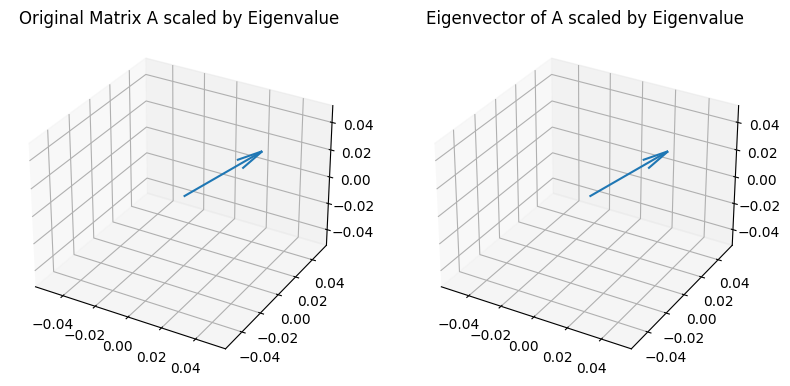

In [13]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.quiver(0, 0, 0, ax_a[0], ax_a[1], ax_a[2], length=0.05, normalize=True)
ax1.title.set_text('Original Matrix A scaled by Eigenvalue')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.quiver(0, 0, 0, lx_a[0], lx_a[1], lx_a[2], length=0.05, normalize=True)
ax2.title.set_text('Eigenvector of A scaled by Eigenvalue')

plt.show()